<h1>ENB4</h1><br>
<h2>More simple Feed Forward networks</h2><br>
Some more experimentation with simple feed forward networks.  These experiments will be simple and will follow some of the guidance I've found re; starting points with layers and neurons.  I will be keeping the number hidden layers limited to no greater than 2 for this round of experiments and all of the layers will have the same number of nuerons. The number of nuerons will be determined as a % of the input layer and will be 150%, 125%, 100%, 75%, 50% & 25%.

In [1]:
import numpy as np
import tensorflow as tf
import os
import csv
import matplotlib.pyplot as plt
from keras import models
from keras import layers

C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\s

<h2>Pre-processing</h2>

In [2]:
import pre_process as pp

In [3]:
data, labels = pp.pre_process()

concatenating files
AReMv1\bending1\dataset1.csv
AReMv1\bending1\dataset2.csv
AReMv1\bending1\dataset3.csv
AReMv1\bending1\dataset4.csv
AReMv1\bending1\dataset5.csv
AReMv1\bending1\dataset6.csv
AReMv1\bending1\dataset7.csv
AReMv1\bending2\dataset1.csv
AReMv1\bending2\dataset2.csv
AReMv1\bending2\dataset3.csv
AReMv1\bending2\dataset5.csv
AReMv1\bending2\dataset6.csv
AReMv1\cycling\dataset1.csv
AReMv1\cycling\dataset10.csv
AReMv1\cycling\dataset11.csv
AReMv1\cycling\dataset12.csv
AReMv1\cycling\dataset13.csv
AReMv1\cycling\dataset14.csv
AReMv1\cycling\dataset15.csv
AReMv1\cycling\dataset2.csv
AReMv1\cycling\dataset3.csv
AReMv1\cycling\dataset4.csv
AReMv1\cycling\dataset5.csv
AReMv1\cycling\dataset6.csv
AReMv1\cycling\dataset7.csv
AReMv1\cycling\dataset8.csv
AReMv1\cycling\dataset9.csv
AReMv1\lying\dataset1.csv
AReMv1\lying\dataset10.csv
AReMv1\lying\dataset11.csv
AReMv1\lying\dataset12.csv
AReMv1\lying\dataset13.csv
AReMv1\lying\dataset14.csv
AReMv1\lying\dataset15.csv
AReMv1\lying\datas

In [4]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = pp.shuffle_split(data, labels)

In [36]:
summary =[]

<h2>Exp:4a</h2><br>
1 layer, 720 neurons

In [5]:
net = models.Sequential()
net.add(layers.Dense(480, input_shape = (480,6)))
net.add(layers.Dense (720, activation = 'relu'))
net.add(layers.Flatten())
net.add(layers.Dense(7, activation = 'sigmoid'))
net.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 480, 480)          3360      
_________________________________________________________________
dense_2 (Dense)              (None, 480, 720)          346320    
_________________________________________________________________
flatten_1 (Flatten)          (None, 345600)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 2419207   
Total params: 2,768,887
Trainable params: 2,768,887
Non-trainable params: 0
_________________________________________________________________


In [6]:
net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = net.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 18ms/step - loss: 2.5229 - accuracy: 0.2041 - val_loss: 2.3227 - val_accuracy: 0.2105
Epoch 2/11
49/49 [==============================] - 1s 10ms/step - loss: 1.8440 - accuracy: 0.3673 - val_loss: 1.8488 - val_accuracy: 0.1053
Epoch 3/11
49/49 [==============================] - 1s 10ms/step - loss: 1.7107 - accuracy: 0.4694 - val_loss: 1.6618 - val_accuracy: 0.4211
Epoch 4/11
49/49 [==============================] - 1s 11ms/step - loss: 1.4726 - accuracy: 0.4898 - val_loss: 1.3542 - val_accuracy: 0.4737
Epoch 5/11
49/49 [==============================] - 1s 11ms/step - loss: 1.1649 - accuracy: 0.6531 - val_loss: 1.6450 - val_accuracy: 0.2105
Epoch 6/11
49/49 [==============================] - 1s 11ms/step - loss: 1.0466 - accuracy: 0.5510 - val_loss: 0.9409 - val_accuracy: 0.6316
Epoch 7/11
49/4

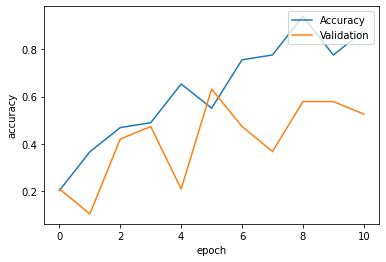

In [7]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

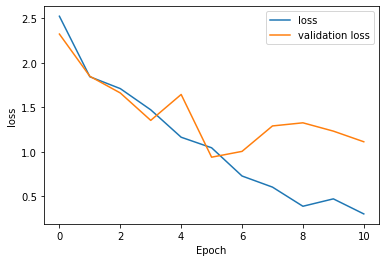

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [9]:
net.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 4ms/step


[0.8477730751037598, 0.7058823704719543]

<h2>Exp:4b</h2><br>
1layer 600 nuerons

In [10]:
net = models.Sequential()
net.add(layers.Dense(480, input_shape = (480,6)))
net.add(layers.Dense (600, activation = 'relu'))
net.add(layers.Flatten())
net.add(layers.Dense(7, activation = 'sigmoid'))
net.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 480, 480)          3360      
_________________________________________________________________
dense_5 (Dense)              (None, 480, 600)          288600    
_________________________________________________________________
flatten_2 (Flatten)          (None, 288000)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 2016007   
Total params: 2,307,967
Trainable params: 2,307,967
Non-trainable params: 0
_________________________________________________________________


In [11]:
net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = net.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 15ms/step - loss: 2.4603 - accuracy: 0.1020 - val_loss: 2.1460 - val_accuracy: 0.0526
Epoch 2/11
49/49 [==============================] - 0s 10ms/step - loss: 1.8933 - accuracy: 0.2041 - val_loss: 1.7850 - val_accuracy: 0.0526
Epoch 3/11
49/49 [==============================] - 0s 9ms/step - loss: 1.7090 - accuracy: 0.2245 - val_loss: 1.6167 - val_accuracy: 0.3684
Epoch 4/11
49/49 [==============================] - 0s 9ms/step - loss: 1.4307 - accuracy: 0.5102 - val_loss: 1.2934 - val_accuracy: 0.4737
Epoch 5/11
49/49 [==============================] - 0s 8ms/step - loss: 1.2404 - accuracy: 0.6122 - val_loss: 1.3923 - val_accuracy: 0.4211
Epoch 6/11
49/49 [==============================] - 0s 10ms/step - loss: 0.9669 - accuracy: 0.5714 - val_loss: 1.7680 - val_accuracy: 0.2105
Epoch 7/11
49/49 [==============================] - 0s 10ms/step - loss: 0.9777 - accuracy: 0.5510 - val_loss: 1.

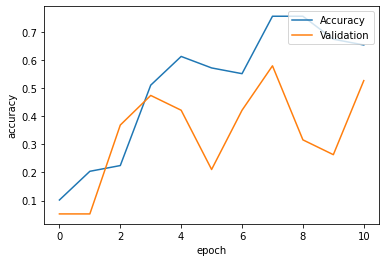

In [12]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

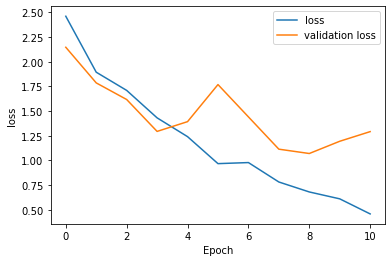

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [14]:
net.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 3ms/step


[0.7532444000244141, 0.7058823704719543]

<h2>Exp:4c</h2><br>
1 layer 480 nuerons

In [15]:
net = models.Sequential()
net.add(layers.Dense(480, input_shape = (480,6)))
net.add(layers.Dense (480, activation = 'relu'))
net.add(layers.Flatten())
net.add(layers.Dense(7, activation = 'sigmoid'))
net.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 480, 480)          3360      
_________________________________________________________________
dense_8 (Dense)              (None, 480, 480)          230880    
_________________________________________________________________
flatten_3 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 1612807   
Total params: 1,847,047
Trainable params: 1,847,047
Non-trainable params: 0
_________________________________________________________________


In [16]:
net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = net.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 12ms/step - loss: 2.0184 - accuracy: 0.1633 - val_loss: 2.0449 - val_accuracy: 0.0526
Epoch 2/11
49/49 [==============================] - 0s 7ms/step - loss: 2.0951 - accuracy: 0.2041 - val_loss: 1.7083 - val_accuracy: 0.0526
Epoch 3/11
49/49 [==============================] - 0s 8ms/step - loss: 1.6567 - accuracy: 0.2449 - val_loss: 1.7173 - val_accuracy: 0.1579
Epoch 4/11
49/49 [==============================] - 0s 7ms/step - loss: 1.5555 - accuracy: 0.5306 - val_loss: 1.7184 - val_accuracy: 0.2632
Epoch 5/11
49/49 [==============================] - 0s 7ms/step - loss: 1.2862 - accuracy: 0.6735 - val_loss: 1.4888 - val_accuracy: 0.3158
Epoch 6/11
49/49 [==============================] - 0s 8ms/step - loss: 1.0187 - accuracy: 0.5102 - val_loss: 1.0820 - val_accuracy: 0.3684
Epoch 7/11
49/49 [==============================] - 0s 7ms/step - loss: 0.8573 - accuracy: 0.6735 - val_loss: 1.260

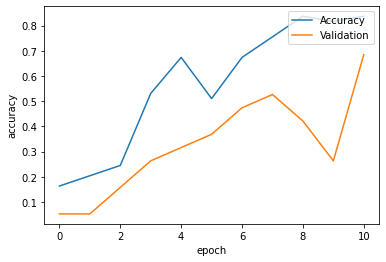

In [17]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

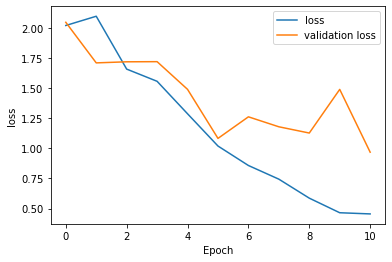

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [19]:
net.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 2ms/step


[0.7141216397285461, 0.8823529481887817]

<h2>Exp:4d</h2>
<br>
1 layer 360 neurons

In [20]:
net = models.Sequential()
net.add(layers.Dense(480, input_shape = (480,6)))
net.add(layers.Dense (360, activation = 'relu'))
net.add(layers.Flatten())
net.add(layers.Dense(7, activation = 'sigmoid'))
net.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_11 (Dense)             (None, 480, 360)          173160    
_________________________________________________________________
flatten_4 (Flatten)          (None, 172800)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 7)                 1209607   
Total params: 1,386,127
Trainable params: 1,386,127
Non-trainable params: 0
_________________________________________________________________


In [21]:
net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = net.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 11ms/step - loss: 2.1737 - accuracy: 0.1633 - val_loss: 2.8871 - val_accuracy: 0.1053
Epoch 2/11
49/49 [==============================] - 0s 6ms/step - loss: 1.9409 - accuracy: 0.3265 - val_loss: 1.8158 - val_accuracy: 0.3684
Epoch 3/11
49/49 [==============================] - 0s 6ms/step - loss: 1.6700 - accuracy: 0.4082 - val_loss: 1.4978 - val_accuracy: 0.6316
Epoch 4/11
49/49 [==============================] - 0s 6ms/step - loss: 1.4955 - accuracy: 0.5918 - val_loss: 1.3578 - val_accuracy: 0.6842
Epoch 5/11
49/49 [==============================] - 0s 5ms/step - loss: 1.2056 - accuracy: 0.6327 - val_loss: 1.5251 - val_accuracy: 0.1053
Epoch 6/11
49/49 [==============================] - 0s 5ms/step - loss: 0.9325 - accuracy: 0.5714 - val_loss: 1.5027 - val_accuracy: 0.3158
Epoch 7/11
49/49 [==============================] - 0s 6ms/step - loss: 0.8232 - accuracy: 0.6122 - val_loss: 0.839

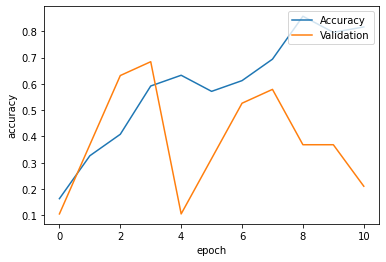

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

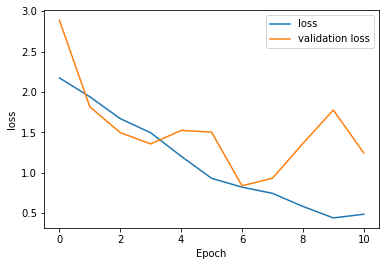

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [24]:
net.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 2ms/step


[0.8436177372932434, 0.6470588445663452]

<h2>Exp:4e</h2><br>
1 layer 240 neurons

In [25]:
net = models.Sequential()
net.add(layers.Dense(480, input_shape = (480,6)))
net.add(layers.Dense (240, activation = 'relu'))
net.add(layers.Flatten())
net.add(layers.Dense(7, activation = 'sigmoid'))
net.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_14 (Dense)             (None, 480, 240)          115440    
_________________________________________________________________
flatten_5 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 806407    
Total params: 925,207
Trainable params: 925,207
Non-trainable params: 0
_________________________________________________________________


In [26]:
net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = net.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 0s 10ms/step - loss: 2.1861 - accuracy: 0.1633 - val_loss: 2.7792 - val_accuracy: 0.0526
Epoch 2/11
49/49 [==============================] - 0s 4ms/step - loss: 1.9605 - accuracy: 0.2041 - val_loss: 1.8989 - val_accuracy: 0.0526
Epoch 3/11
49/49 [==============================] - 0s 4ms/step - loss: 1.6815 - accuracy: 0.2857 - val_loss: 1.6042 - val_accuracy: 0.5263
Epoch 4/11
49/49 [==============================] - 0s 5ms/step - loss: 1.5184 - accuracy: 0.4898 - val_loss: 1.4297 - val_accuracy: 0.5263
Epoch 5/11
49/49 [==============================] - 0s 4ms/step - loss: 1.2613 - accuracy: 0.6735 - val_loss: 1.4077 - val_accuracy: 0.2105
Epoch 6/11
49/49 [==============================] - 0s 4ms/step - loss: 1.0393 - accuracy: 0.4082 - val_loss: 1.6622 - val_accuracy: 0.3158
Epoch 7/11
49/49 [==============================] - 0s 4ms/step - loss: 0.9538 - accuracy: 0.4694 - val_loss: 1.188

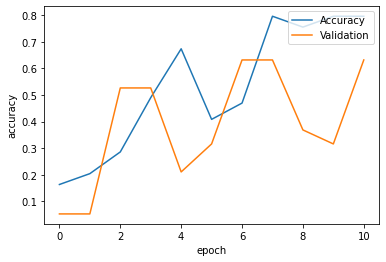

In [27]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

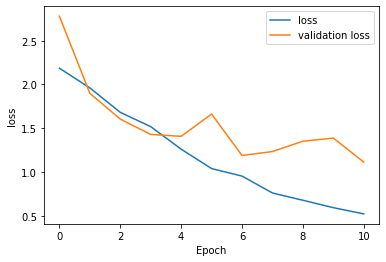

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [29]:
net.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 2ms/step


[0.7777358293533325, 0.7647058963775635]

<h2>Exp:4f</h2>
<br>
1 layer 120 neurons

In [31]:
net = models.Sequential()
net.add(layers.Dense(480, input_shape = (480,6)))
net.add(layers.Dense (120, activation = 'relu'))
net.add(layers.Flatten())
net.add(layers.Dense(7, activation = 'sigmoid'))
net.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_20 (Dense)             (None, 480, 120)          57720     
_________________________________________________________________
flatten_7 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 7)                 403207    
Total params: 464,287
Trainable params: 464,287
Non-trainable params: 0
_________________________________________________________________


In [32]:
net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = net.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 0s 9ms/step - loss: 1.9762 - accuracy: 0.1020 - val_loss: 1.9769 - val_accuracy: 0.0526
Epoch 2/11
49/49 [==============================] - 0s 3ms/step - loss: 1.8325 - accuracy: 0.2041 - val_loss: 1.7453 - val_accuracy: 0.3684
Epoch 3/11
49/49 [==============================] - 0s 2ms/step - loss: 1.6643 - accuracy: 0.4286 - val_loss: 1.6077 - val_accuracy: 0.4737
Epoch 4/11
49/49 [==============================] - 0s 3ms/step - loss: 1.4854 - accuracy: 0.6327 - val_loss: 1.5680 - val_accuracy: 0.2632
Epoch 5/11
49/49 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.5102 - val_loss: 1.6459 - val_accuracy: 0.3158
Epoch 6/11
49/49 [==============================] - 0s 3ms/step - loss: 1.0480 - accuracy: 0.5102 - val_loss: 1.2468 - val_accuracy: 0.3684
Epoch 7/11
49/49 [==============================] - 0s 2ms/step - loss: 0.8107 - accuracy: 0.6531 - val_loss: 1.4500

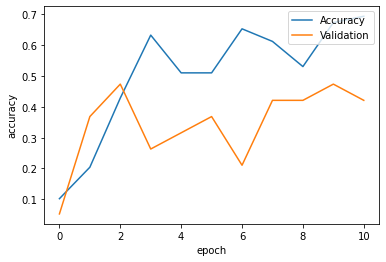

In [33]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

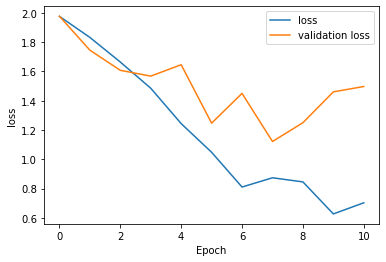

In [34]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [39]:
f = net.evaluate(test_data, test_labels)
f.insert(0,'f')
print(f)
summary.append(f)

17/17 [==============================] - 0s 2ms/step
['f', 0.7733920216560364, 0.6470588445663452]


In [40]:
print(summary)

[[0.7733920216560364, 0.6470588445663452], ['f', 0.7733920216560364, 0.6470588445663452]]
